<a href="https://colab.research.google.com/github/bharathkumarmanickam/Sales_Forecasting/blob/main/Time_Series_Forecasting_Using_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# from google.colab import drive
# drive.mount('/content/drive')

In [58]:
#!pip install xlrd  #install this if you didnt have xlrd to read the excel files
import pandas as pd

body = ('/content/drive/MyDrive/dataset/salesdata.xls')

data = pd.read_excel(body)



In [59]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [60]:
#this is for import section
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [62]:
data.Category.unique() # we can understoood we can find the sales data on the these columns

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [63]:
#first we find the furniture
furniture = data.loc[data['Category'] == 'Furniture']

In [64]:
#now we have to check the start and last date to check the how many data we have
min = furniture['Order Date'].min()
max = furniture['Order Date'].max()
print(max -min)

# 1454 = 3.983562 days so approx 4 years data we have to calculate

1454 days 00:00:00


In [65]:
#data preprocessing

#now we take only the order date and sales on the data by removing all others
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols,axis=1,inplace=True) #axis = 1 measn that is delete all the vertical datapoints in the furniture dataframe
furniture = furniture.sort_values('Order Date')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
furniture.isnull().sum() # there is no null data points

Order Date    0
Sales         0
dtype: int64

In [67]:
furniture #we can analyse now the dataframe
furniture_orginal = furniture.copy()

In [68]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()


In [69]:
furniture = furniture.set_index('Order Date')

In [70]:
furniture.index #this is done to remove from default index 0 to n to order by order date

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [71]:
#in this dataframe we have more data in a single month so we are going to shorten that by using resample('MS') Month start of the frequency
y = furniture['Sales'].resample('MS').mean()

In [72]:
y[:]

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

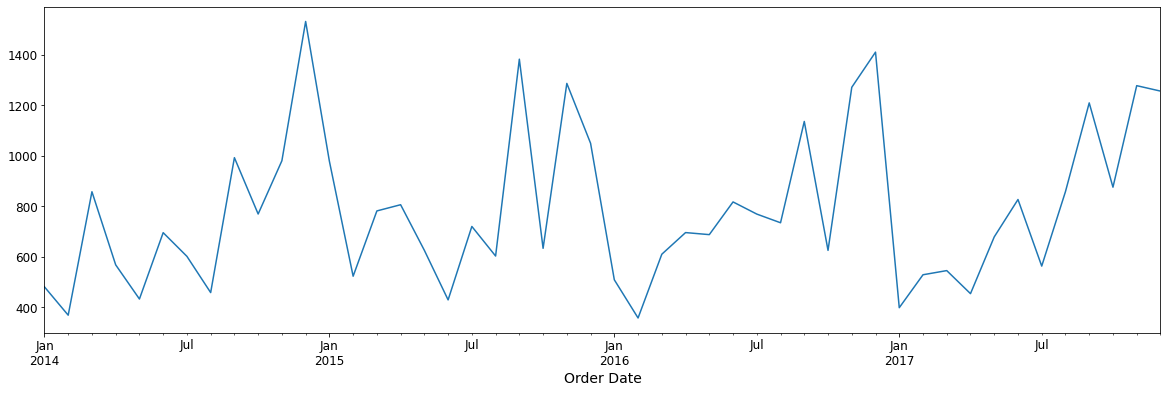

In [73]:
y.plot(figsize=(20,6));
plt.show()

In [74]:
#!pip install statsmodels

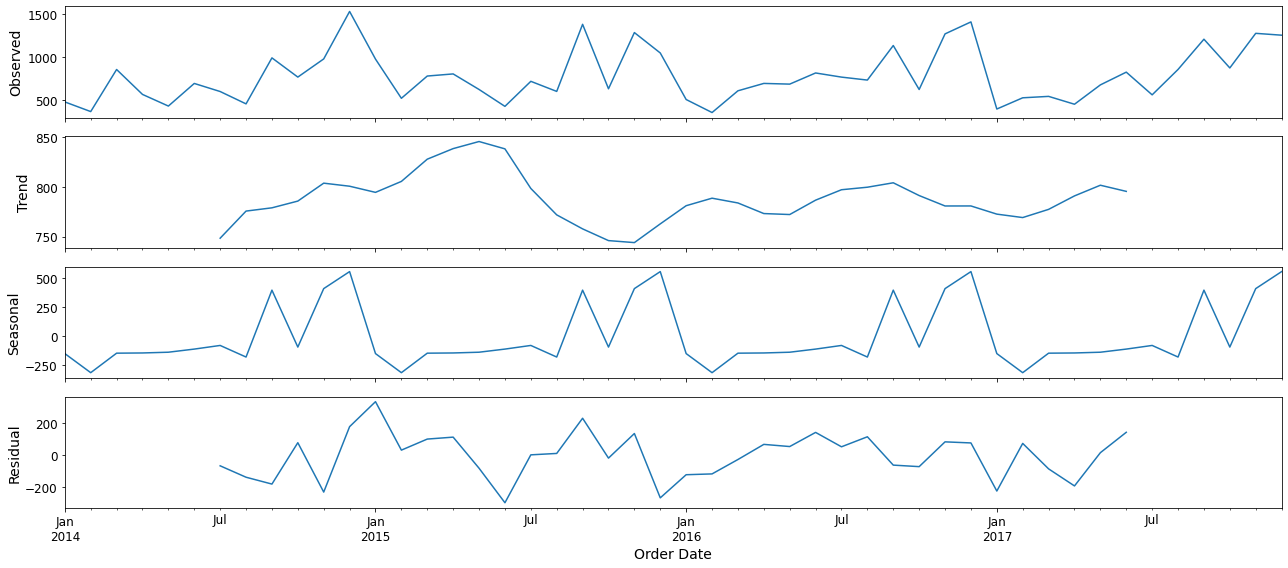

In [75]:
#there is so many distinguisable patterns appear when we plot the data. there is always uptrend so we use time-series decomposition => trend, seasonability and noise.
# Trend: The increasing or decreasing value in the series. 
# Seasonality: The repeating short-term cycle in the series. 
# Noise: The random variation in the series
from pylab import rcParams
import statsmodels.api as sm
import matplotlib
rcParams['figure.figsize'] = 18,8
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

decom = sm.tsa.seasonal_decompose(y,model='additive')
fig = decom.plot()
plt.show()

In [76]:
#now we can there is unstable in furniture sales
#Now We are going to forecast the case using the ARIMA (Autoregression Integrated Moving Average) => ARIMA(p,d,q)=> seasonability,trend and noise in the data

In [77]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [78]:
#now we can see the seasonal ARIMAX(SARIMA)
print('SARIMAX: {} X {} '.format(pdq[1],seasonal_pdq[1]))

SARIMAX: (0, 0, 1) X (0, 0, 1, 12) 


In [79]:
#Now we are going to get the parameter selection for our ARIMA Time Seroes here we are going to use the 'Grid Search' to find optimal set of parameters to get better performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order = param_seasonal, enforce_stationarity = False, enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA {} X {}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA (0, 0, 0) X (0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA (0, 0, 0) X (0, 0, 1, 12)12 - AIC:1291.1586461285508
ARIMA (0, 0, 0) X (0, 1, 0, 12)12 - AIC:477.71701309202774
ARIMA (0, 0, 0) X (1, 0, 0, 12)12 - AIC:497.2314433418337


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (0, 0, 0) X (1, 0, 1, 12)12 - AIC:1341.4774825752884
ARIMA (0, 0, 0) X (1, 1, 0, 12)12 - AIC:318.0047199116341


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (0, 0, 1) X (0, 0, 0, 12)12 - AIC:720.9252270758116
ARIMA (0, 0, 1) X (0, 0, 1, 12)12 - AIC:2890.3956414293407
ARIMA (0, 0, 1) X (0, 1, 0, 12)12 - AIC:466.5607429809134
ARIMA (0, 0, 1) X (1, 0, 0, 12)12 - AIC:499.5815754980983


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (0, 0, 1) X (1, 0, 1, 12)12 - AIC:2592.49103021319
ARIMA (0, 0, 1) X (1, 1, 0, 12)12 - AIC:319.98848769468657
ARIMA (0, 1, 0) X (0, 0, 0, 12)12 - AIC:677.894766843944


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (0, 1, 0) X (0, 0, 1, 12)12 - AIC:1354.9157815720205
ARIMA (0, 1, 0) X (0, 1, 0, 12)12 - AIC:486.6378567198382
ARIMA (0, 1, 0) X (1, 0, 0, 12)12 - AIC:497.78896630044073
ARIMA (0, 1, 0) X (1, 0, 1, 12)12 - AIC:1006.8019521666
ARIMA (0, 1, 0) X (1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA (0, 1, 1) X (0, 0, 0, 12)12 - AIC:649.9056176817193
ARIMA (0, 1, 1) X (0, 0, 1, 12)12 - AIC:2534.1807038393567
ARIMA (0, 1, 1) X (0, 1, 0, 12)12 - AIC:458.8705548482836
ARIMA (0, 1, 1) X (1, 0, 0, 12)12 - AIC:486.1832977442613
ARIMA (0, 1, 1) X (1, 0, 1, 12)12 - AIC:2359.5912392244145
ARIMA (0, 1, 1) X (1, 1, 0, 12)12 - AIC:310.7574368417338
ARIMA (1, 0, 0) X (0, 0, 0, 12)12 - AIC:692.1645522067712
ARIMA (1, 0, 0) X (0, 0, 1, 12)12 - AIC:1450.898321496226
ARIMA (1, 0, 0) X (0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA (1, 0, 0) X (1, 0, 0, 12)12 - AIC:480.9259367935194


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (1, 0, 0) X (1, 0, 1, 12)12 - AIC:1262.338613078044
ARIMA (1, 0, 0) X (1, 1, 0, 12)12 - AIC:304.4664675084582
ARIMA (1, 0, 1) X (0, 0, 0, 12)12 - AIC:665.7794442185634
ARIMA (1, 0, 1) X (0, 0, 1, 12)12 - AIC:2665.6367167733683
ARIMA (1, 0, 1) X (0, 1, 0, 12)12 - AIC:468.3685195815885
ARIMA (1, 0, 1) X (1, 0, 0, 12)12 - AIC:482.5763323876976


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (1, 0, 1) X (1, 0, 1, 12)12 - AIC:2536.9149846409973
ARIMA (1, 0, 1) X (1, 1, 0, 12)12 - AIC:306.01560020902036
ARIMA (1, 1, 0) X (0, 0, 0, 12)12 - AIC:671.2513547541902
ARIMA (1, 1, 0) X (0, 0, 1, 12)12 - AIC:1508.5821409861014
ARIMA (1, 1, 0) X (0, 1, 0, 12)12 - AIC:479.20034222811347
ARIMA (1, 1, 0) X (1, 0, 0, 12)12 - AIC:475.3403658784957


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (1, 1, 0) X (1, 0, 1, 12)12 - AIC:1331.2919470409036
ARIMA (1, 1, 0) X (1, 1, 0, 12)12 - AIC:300.6270901345411
ARIMA (1, 1, 1) X (0, 0, 0, 12)12 - AIC:649.0318019835603
ARIMA (1, 1, 1) X (0, 0, 1, 12)12 - AIC:2537.4523401808897
ARIMA (1, 1, 1) X (0, 1, 0, 12)12 - AIC:460.47626876093364
ARIMA (1, 1, 1) X (1, 0, 0, 12)12 - AIC:469.5250354660756


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (1, 1, 1) X (1, 0, 1, 12)12 - AIC:nan
ARIMA (1, 1, 1) X (1, 1, 0, 12)12 - AIC:297.7875439533909


In [80]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


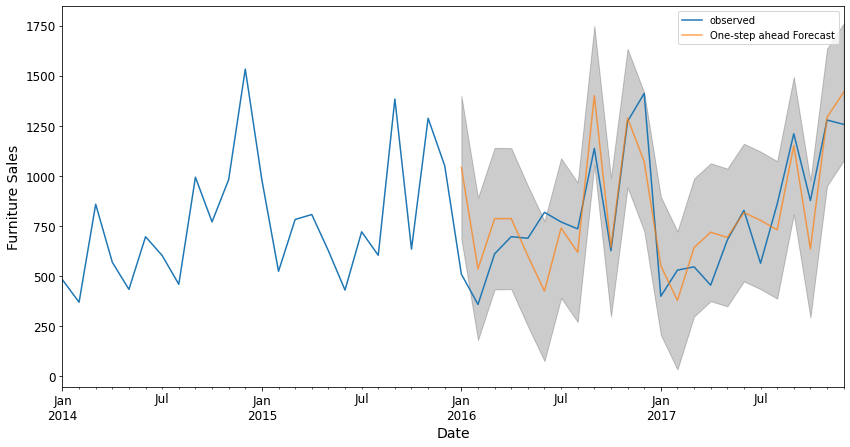

In [81]:
#Now we are predicting with comparsion of observed value and our prediction
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [82]:
#now are going to seee the mean squared error(MSE) and root mean squared error(RMSE) for our forecast
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 22993.57
The Root Mean Squared Error of our forecasts is 151.64


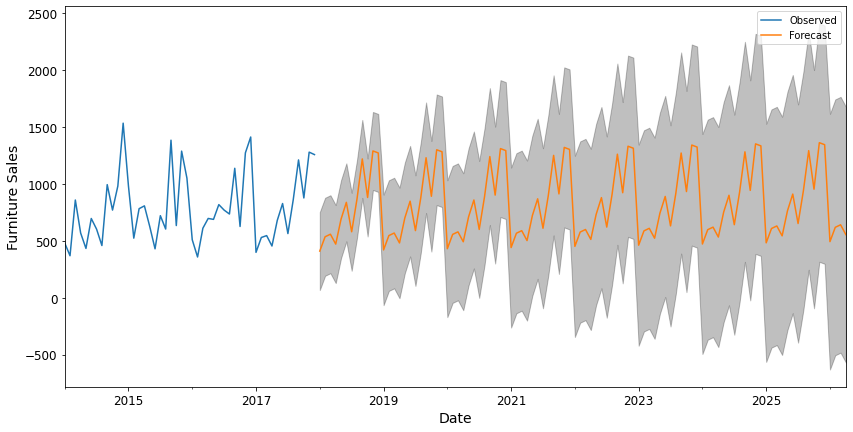

In [83]:
#visualizing Forecast

pred_forecast = results.get_forecast(steps=100)
pred_ci = pred_forecast.conf_int()
ax = y.plot(label='Observed', figsize=(14,7))
pred_forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [84]:
# now we are going to use the Prophet developer by facebook which is helpful in play in time-series action
#!pip install fbprophet
#!pip install pystan==2.19.1.1 prophet

In [85]:
from fbprophet import Prophet


In [88]:
furniture = furniture_orginal.rename(columns={'Order Date':'ds','Sales':'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1800x432 with 0 Axes>

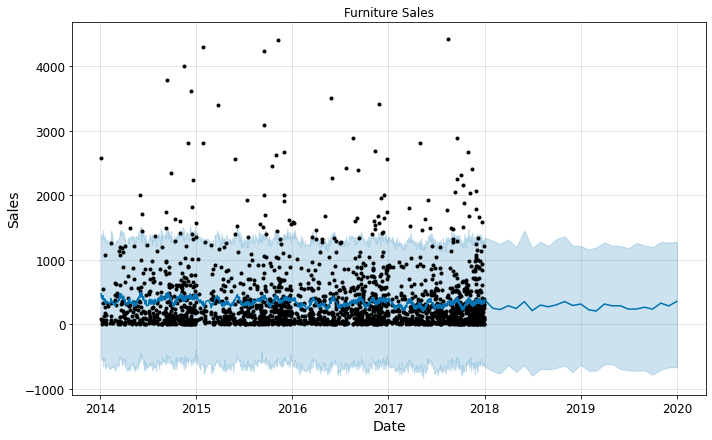

In [91]:
furniture_forecast = furniture_model.make_future_dataframe(periods=25,freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
plt.figure(figsize=(25, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');